In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time
# target funciton

def target(x):
    return 100*(x[0]**2-x[1])**2+(1-x[0])**2

size=30 #编码个数
dimen=2 #编码维数

x_max=np.array([2.048,2.048])
x_min=np.array([-2.048,-2.048])

gener=10 #进化次数
F=1.2  #变异因子
cr=0.6 #交叉因子

In [21]:
# initial x
p=x_min+(x_max-x_min)*np.random.rand(size,dimen)
# global best
x_his=[]
target_his=[]

In [26]:
# evolution
t1=time.time()
for g in range(gener):
    # the g th generation
    v=h=np.empty((size,dimen))

    for s in range(size):
        # the s th x
        
        # aberrance
        r1=r2=r3=0
        while r1==r2 or r1==r3 or r2==r3 or r1==s or r2==s or r3==s :
            r1=int(size*np.random.rand(1)[0])
            r2=int(size*np.random.rand(1)[0])
            r3=int(size*np.random.rand(1)[0])
        h[s]=p[r1]+F*(p[r2]-p[r3])
        h[s]=np.where(h[s]<x_max,h[s],x_max)
        h[s]=np.where(h[s]>x_min,h[s],x_min)
        
        #interact
        temp=np.random.random()
        v[s]=np.where(temp<cr,h[s],p[s])
        
        #select
        p[s]=np.where(target(v[s])>target(p[s]),v[s],p[s]) 
    
    #update
    opt_x=np.argmax(target(p))
    x_his.append(p[opt_x])
    opt_target=np.max(target(p))
    target_his.append(opt_target)

t2=time.time()

花费时间0.0287s
最大值3905.9262
[ 2.048 -2.048]


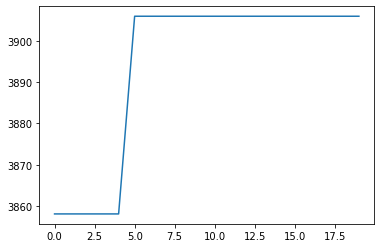

In [27]:
plt.figure(1)
plt.plot(target_his)
print('花费时间%.4fs'%(t2-t1))
print('最大值%.4f'%target_his[-1])
print(x_his[-1])